In [1]:
import numpy as np
import pandas as pd
import os, datetime
import tensorflow as tf
from tensorflow.keras.models import *
from tensorflow.keras.layers import *
print('Tensorflow version: {}'.format(tf.__version__))

import matplotlib.pyplot as plt
plt.style.use('seaborn')

import warnings
warnings.filterwarnings('ignore')

from datetime import datetime
from yahoo_finance_data import download_finance_data
from dateutil.relativedelta import relativedelta
from pre_processing import PreProcessing
from time2vec_transformer_model import Time2VecTransformer
from train_evaluate_model_helper import *

Tensorflow version: 2.3.1


## Hyperparameters

In [2]:
seq_len = 14

d_k = 256
d_v = 256
n_heads = 12
ff_dim = 256

epochs = 40
batch_size = 32

In [3]:
def download_data():
    to_date = datetime.now()
    from_date = to_date - relativedelta(days=700)
    
    return PreProcessing('BTC-GBP',download_finance_data(['BTC-GBP'],from_date,to_date))

# Test 1: Percentage daily change

Prepare a data set of features using only the 5 percentage change in price figures

In [4]:
data = download_data()
data.calculate_normalised_percentage_change()

In [5]:
tvt = Time2VecTransformer('pctg_change',seq_len,d_k,d_v,n_heads,ff_dim)

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 14, 5)]      0                                            
__________________________________________________________________________________________________
time2_vector (Time2Vector)      (None, 14, 2)        56          input_1[0][0]                    
__________________________________________________________________________________________________
concatenate (Concatenate)       (None, 14, 7)        0           input_1[0][0]                    
                                                                 time2_vector[0][0]               
__________________________________________________________________________________________________
transformer_encoder (Transforme (None, 14, 7)        99114       concatenate[0][0]     

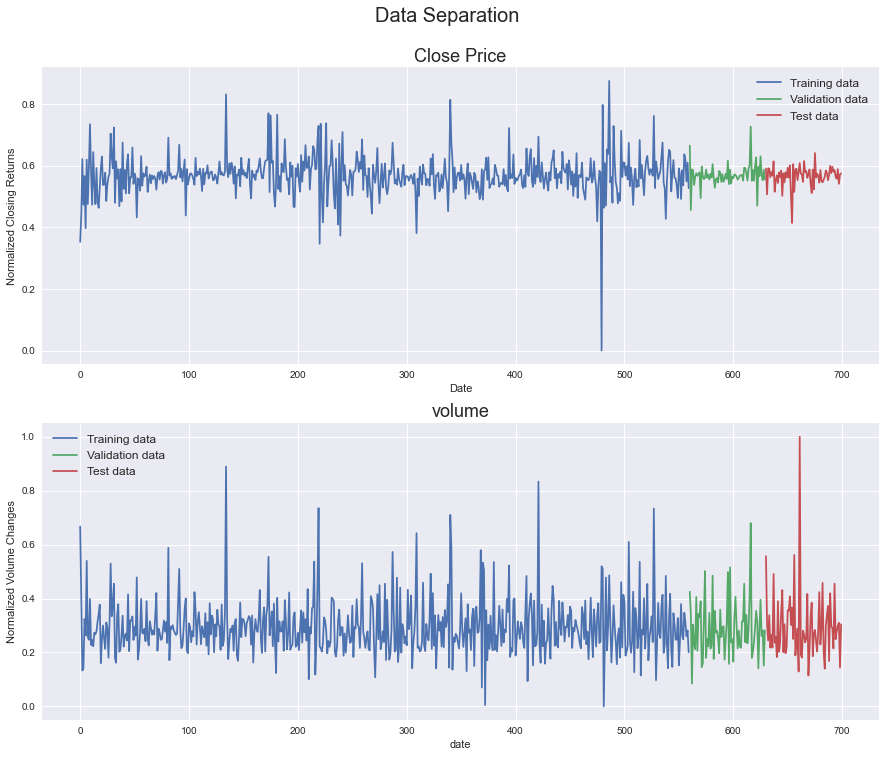

-------------------------------
Fitting model: pctg_change
-------------------------------
Epoch 1/40
17/18 [===========================>..] - ETA: 0s - loss: 0.2727 - mae: 0.5173 - mape: 101764.6875
Epoch 00001: val_loss improved from inf to 0.18697, saving model to pctg_change.hdf5
18/18 [==============================] - 4s 249ms/step - loss: 0.2724 - mae: 0.5171 - mape: 101392.2031 - val_loss: 0.1870 - val_mae: 0.4312 - val_mape: 75.4150
Epoch 2/40
17/18 [===========================>..] - ETA: 0s - loss: 0.1143 - mae: 0.3233 - mape: 436588.7500
Epoch 00002: val_loss improved from 0.18697 to 0.02634, saving model to pctg_change.hdf5
18/18 [==============================] - 1s 70ms/step - loss: 0.1141 - mae: 0.3231 - mape: 434989.6562 - val_loss: 0.0263 - val_mae: 0.1590 - val_mape: 27.6255
Epoch 3/40
17/18 [===========================>..] - ETA: 0s - loss: 0.0126 - mae: 0.0870 - mape: 985925.5000 
Epoch 00003: val_loss improved from 0.02634 to 0.00271, saving model to pctg_change.hd

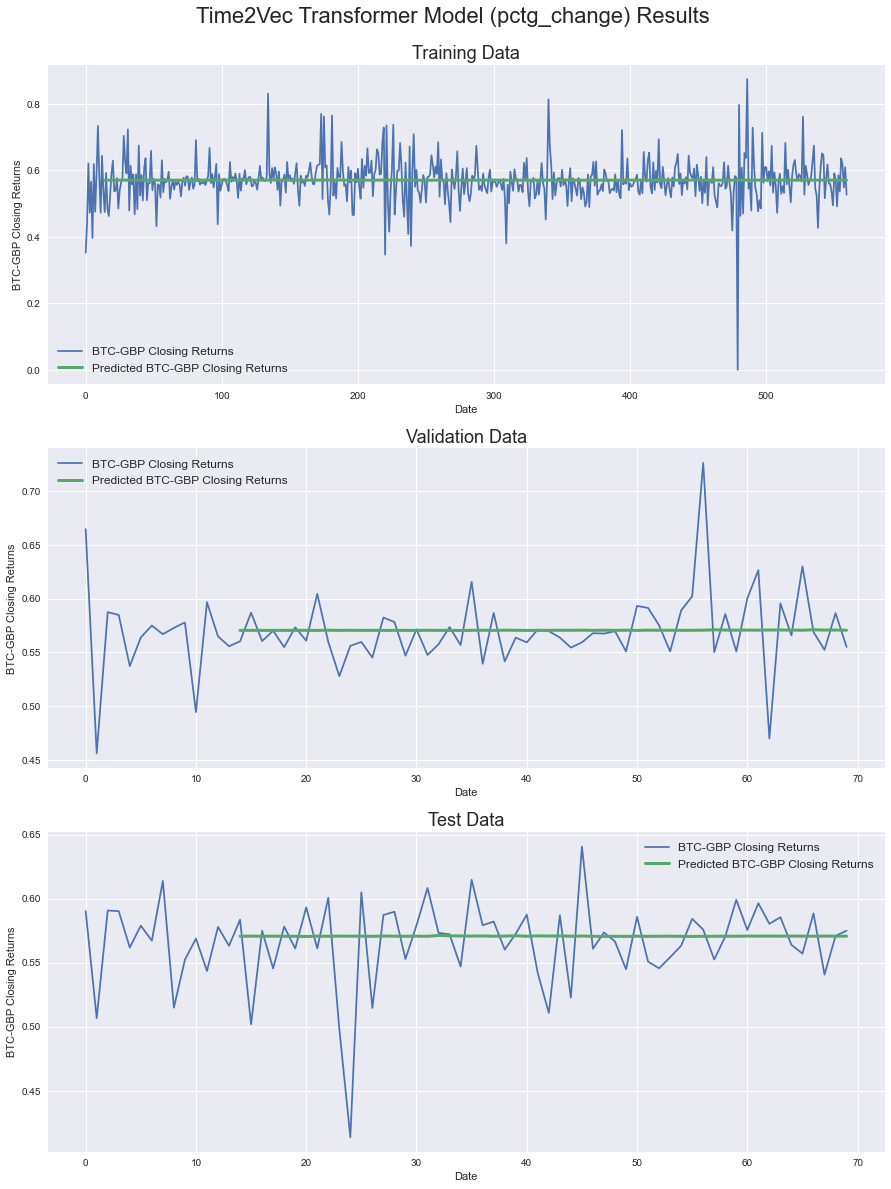

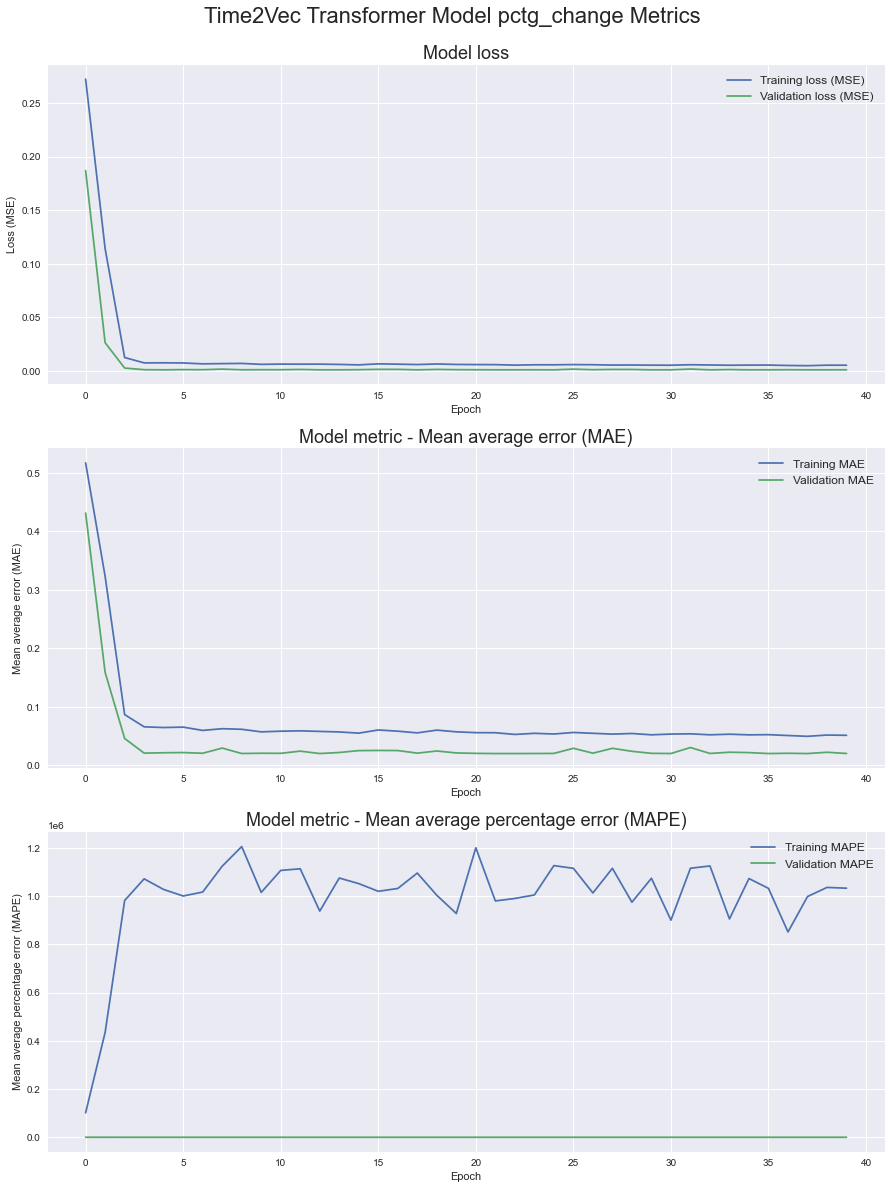

In [6]:
split_train_evalute_model(data,tvt,epochs,batch_size)

# Test 2: Moving Average

Prepare a data set of features using only the 5 percentage change in price figures and a 7 daily moving average

In [7]:
data = download_data()

In [8]:
data.apply_n_day_rolling_average(7)\
.calculate_normalised_percentage_change()

In [9]:
tvt = Time2VecTransformer('pctg_change_7d_ma',seq_len,d_k,d_v,n_heads,ff_dim)

Model: "functional_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 14, 5)]      0                                            
__________________________________________________________________________________________________
time2_vector_2 (Time2Vector)    (None, 14, 2)        56          input_2[0][0]                    
__________________________________________________________________________________________________
concatenate_1 (Concatenate)     (None, 14, 7)        0           input_2[0][0]                    
                                                                 time2_vector_2[0][0]             
__________________________________________________________________________________________________
transformer_encoder_6 (Transfor (None, 14, 7)        99114       concatenate_1[0][0]   

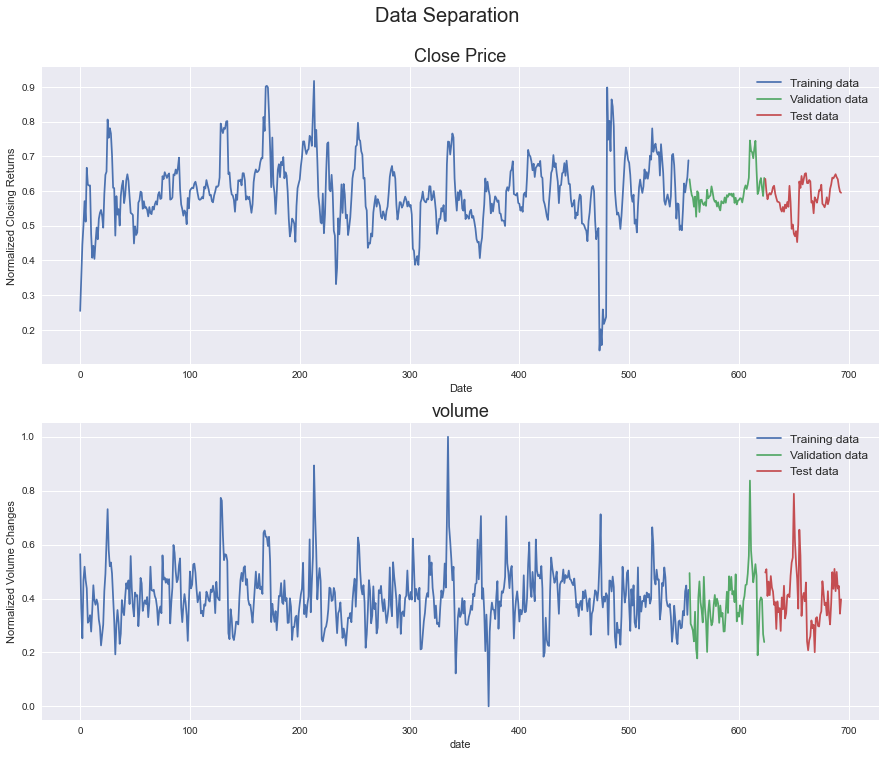

-------------------------------
Fitting model: pctg_change_7d_ma
-------------------------------
Epoch 1/40
16/17 [===========================>..] - ETA: 0s - loss: 0.3116 - mae: 0.5493 - mape: 91.9283
Epoch 00001: val_loss improved from inf to 0.23276, saving model to pctg_change_7d_ma.hdf5
17/17 [==============================] - 4s 261ms/step - loss: 0.3079 - mae: 0.5453 - mape: 91.2827 - val_loss: 0.2328 - val_mae: 0.4800 - val_mape: 79.5929
Epoch 2/40
17/17 [==============================] - ETA: 0s - loss: 0.1512 - mae: 0.3710 - mape: 61.3279
Epoch 00002: val_loss improved from 0.23276 to 0.05348, saving model to pctg_change_7d_ma.hdf5
17/17 [==============================] - 1s 71ms/step - loss: 0.1512 - mae: 0.3710 - mape: 61.3279 - val_loss: 0.0535 - val_mae: 0.2262 - val_mape: 37.1937
Epoch 3/40
16/17 [===========================>..] - ETA: 0s - loss: 0.0250 - mae: 0.1272 - mape: 22.3375
Epoch 00003: val_loss improved from 0.05348 to 0.00338, saving model to pctg_change_7d_ma

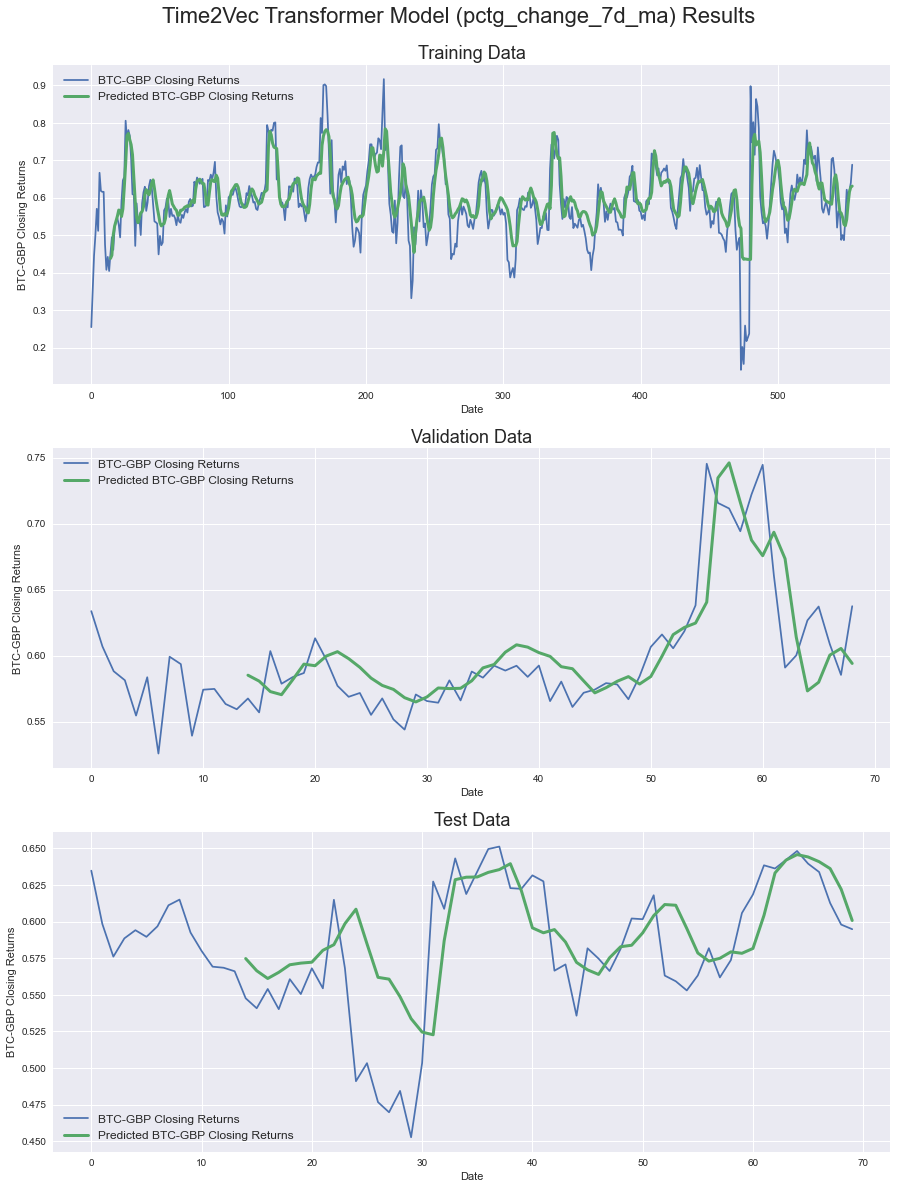

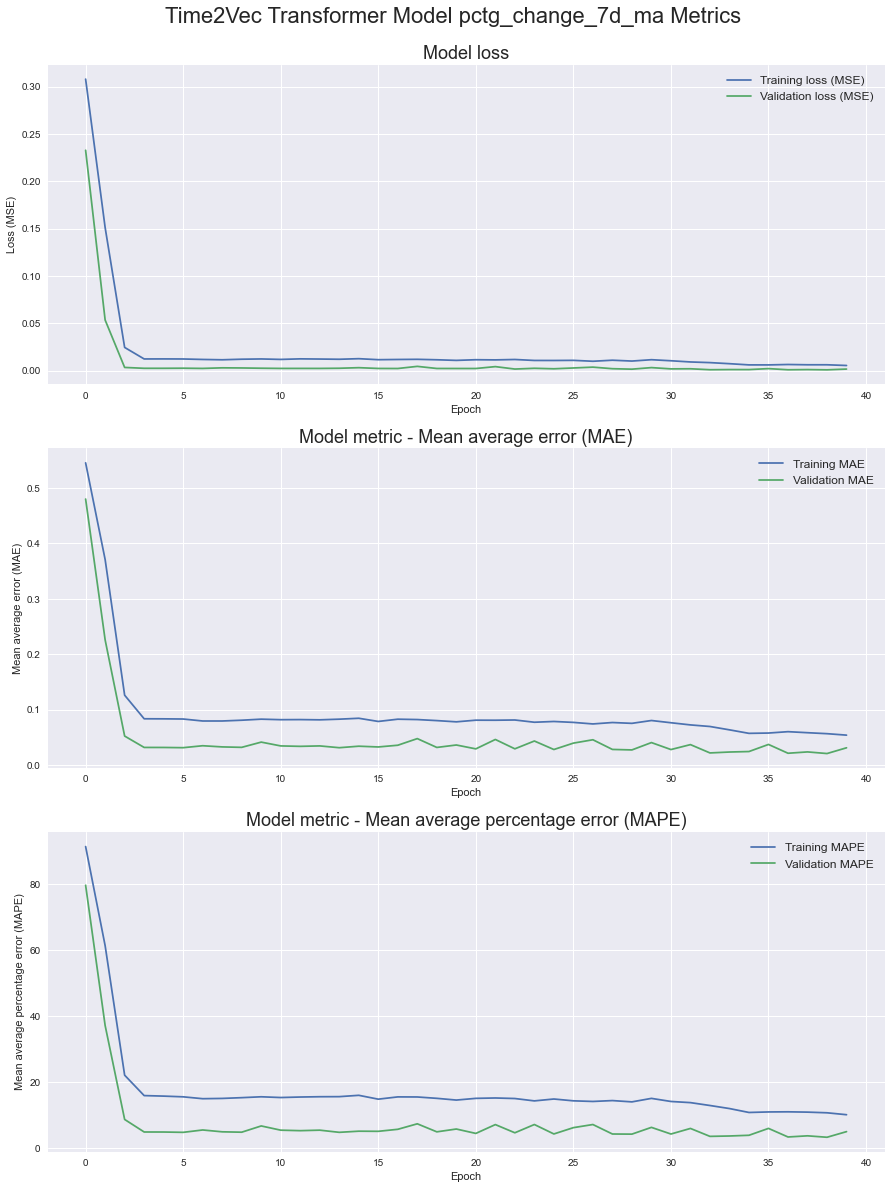

In [10]:
split_train_evalute_model(data,tvt,epochs,batch_size)

# Test 3: Exponentially Weighted Moving Average

Prepare a data set of features using only the 5 percentage change in price figures and a 7 daily exponentially weighted moving average

In [15]:
data = download_data()

In [19]:
data.apply_n_day_exp_weighted_mean(7)\
.calculate_normalised_percentage_change()

In [17]:
tvt = Time2VecTransformer('pctg_change_7d_ewm',seq_len,d_k,d_v,n_heads,ff_dim)

Model: "functional_7"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            [(None, 14, 5)]      0                                            
__________________________________________________________________________________________________
time2_vector_6 (Time2Vector)    (None, 14, 2)        56          input_4[0][0]                    
__________________________________________________________________________________________________
concatenate_3 (Concatenate)     (None, 14, 7)        0           input_4[0][0]                    
                                                                 time2_vector_6[0][0]             
__________________________________________________________________________________________________
transformer_encoder_18 (Transfo (None, 14, 7)        99114       concatenate_3[0][0]   

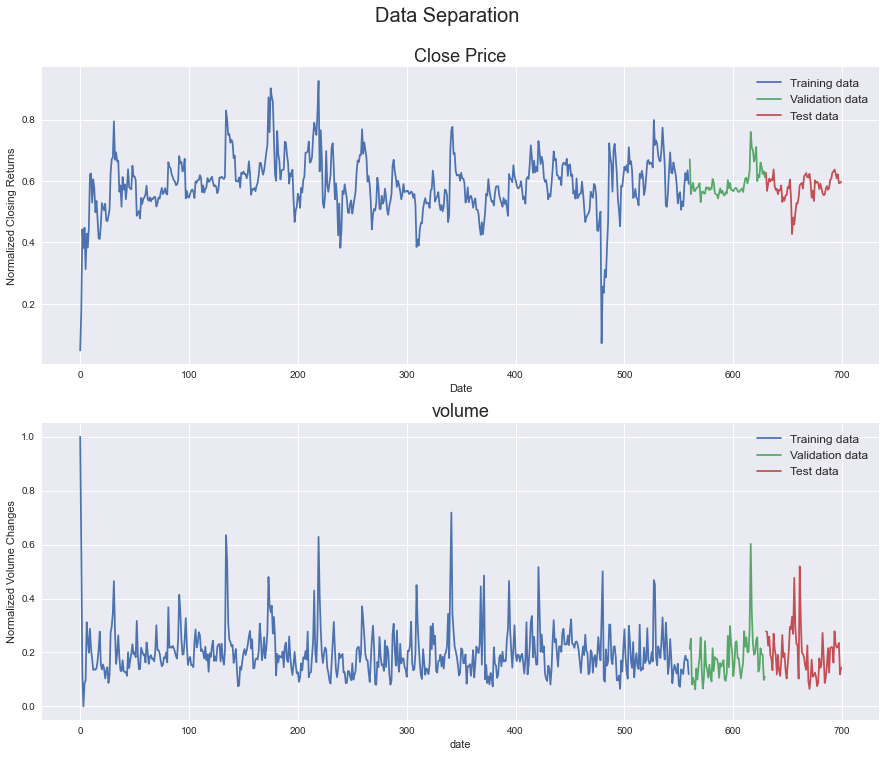

-------------------------------
Fitting model: pctg_change_7d_ewm
-------------------------------
Epoch 1/40
17/18 [===========================>..] - ETA: 0s - loss: 0.2726 - mae: 0.5116 - mape: 86.4519
Epoch 00001: val_loss improved from inf to 0.15058, saving model to pctg_change_7d_ewm.hdf5
18/18 [==============================] - 5s 254ms/step - loss: 0.2722 - mae: 0.5111 - mape: 86.3693 - val_loss: 0.1506 - val_mae: 0.3854 - val_mape: 64.3784
Epoch 2/40
17/18 [===========================>..] - ETA: 0s - loss: 0.0686 - mae: 0.2250 - mape: 37.6297
Epoch 00002: val_loss improved from 0.15058 to 0.00211, saving model to pctg_change_7d_ewm.hdf5
18/18 [==============================] - 1s 70ms/step - loss: 0.0683 - mae: 0.2243 - mape: 37.5065 - val_loss: 0.0021 - val_mae: 0.0329 - val_mape: 5.2562
Epoch 3/40
17/18 [===========================>..] - ETA: 0s - loss: 0.0105 - mae: 0.0772 - mape: 14.8554
Epoch 00003: val_loss did not improve from 0.00211
18/18 [=============================

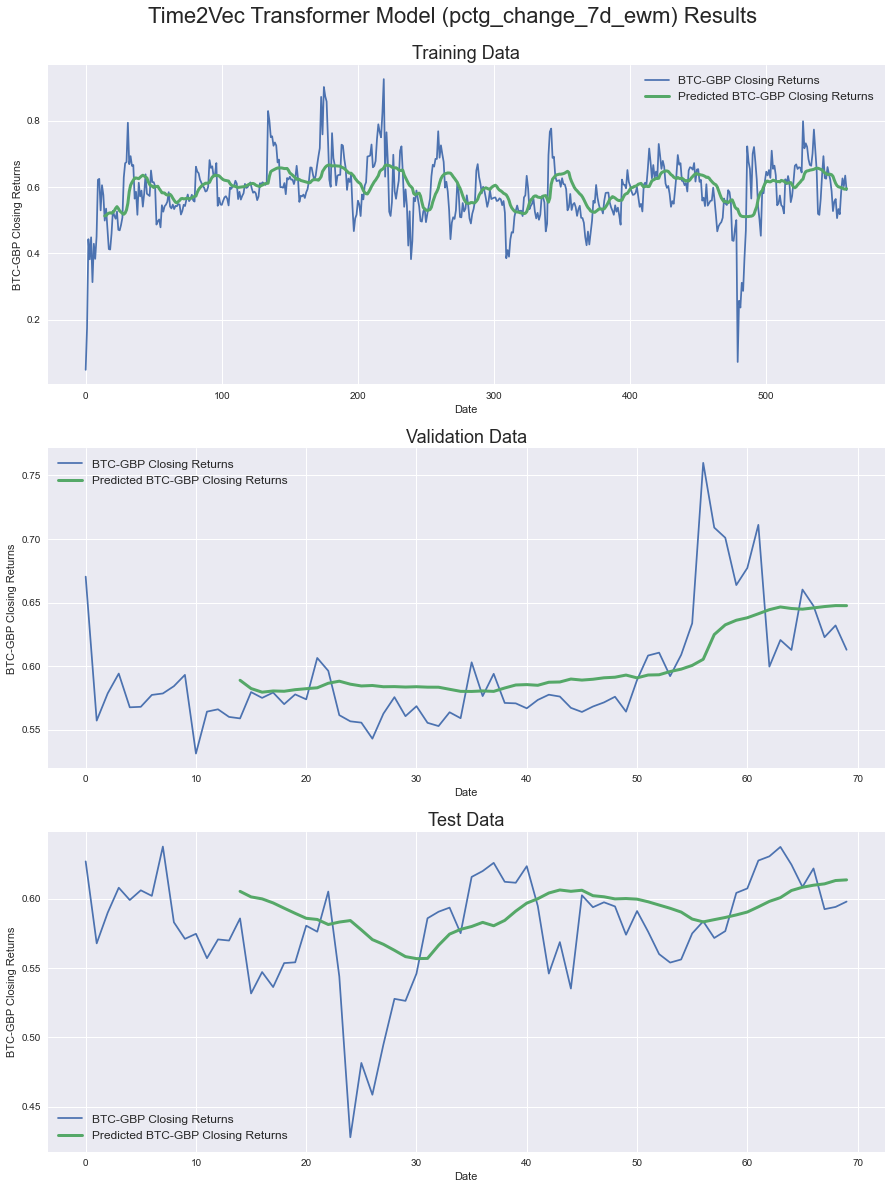

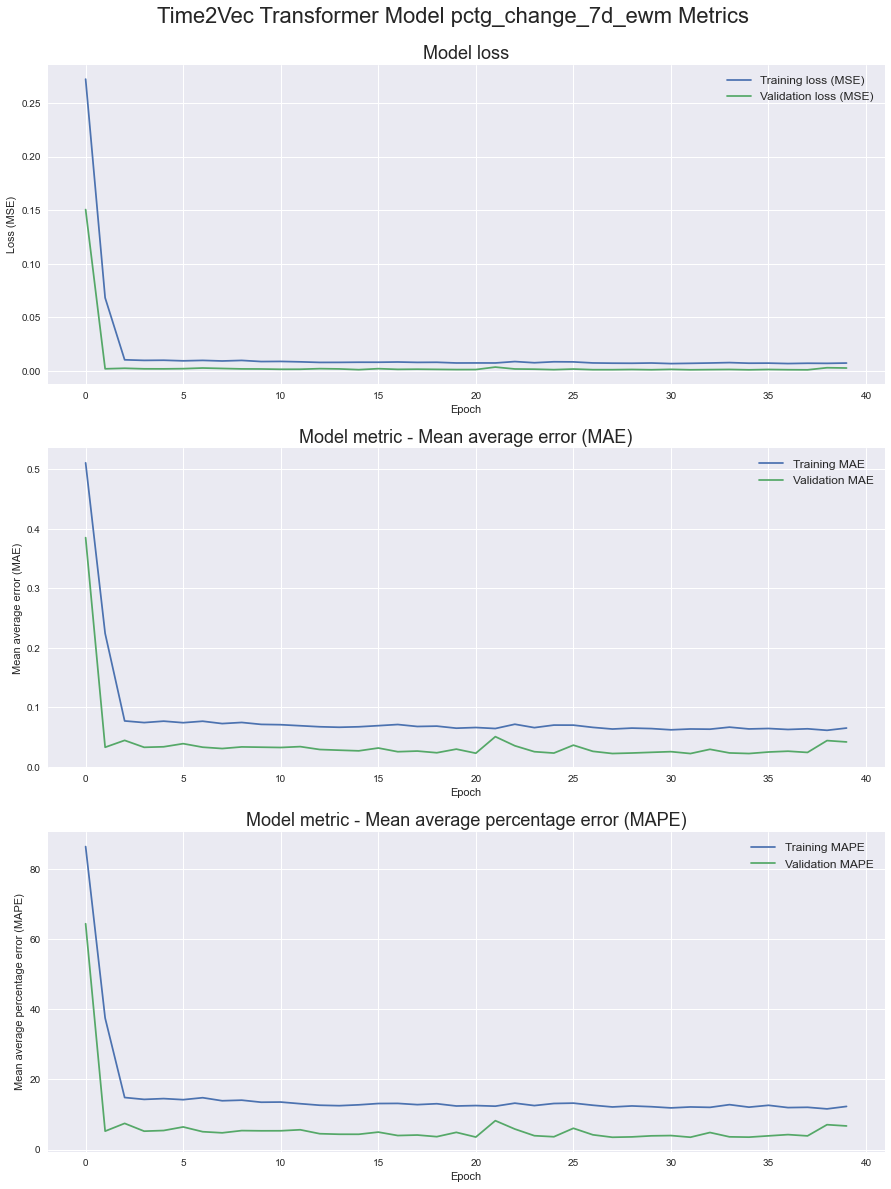

In [18]:
split_train_evalute_model(data,tvt,epochs,batch_size)

# Test 4: 7 Day Moving Average Tuning

Prepare a data set of features using only the 5 percentage change in price figures and a 7 day moving average. Increase the dimensions of key and value to boost trainable parameters in the model up to 1.1m.

In [21]:
seq_len = 14

d_k = 512
d_v = 512
n_heads = 24
ff_dim = 512

epochs = 40
batch_size = 32

In [22]:
data = download_data()

In [23]:
data.apply_n_day_rolling_average(7)\
.calculate_normalised_percentage_change()

In [24]:
tvt = Time2VecTransformer('pctg_change_7d_ma_1.1m_params',seq_len,d_k,d_v,n_heads,ff_dim)

Model: "functional_9"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            [(None, 14, 5)]      0                                            
__________________________________________________________________________________________________
time2_vector_8 (Time2Vector)    (None, 14, 2)        56          input_5[0][0]                    
__________________________________________________________________________________________________
concatenate_4 (Concatenate)     (None, 14, 7)        0           input_5[0][0]                    
                                                                 time2_vector_8[0][0]             
__________________________________________________________________________________________________
transformer_encoder_24 (Transfo (None, 14, 7)        388650      concatenate_4[0][0]   

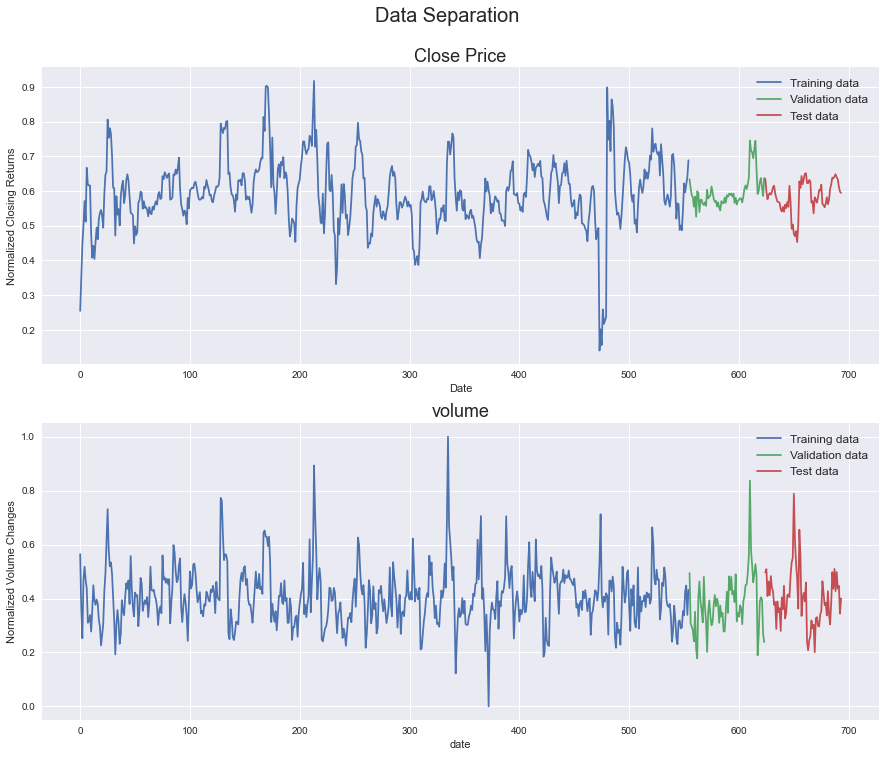

-------------------------------
Fitting model: pctg_change_7d_ewm
-------------------------------
Epoch 1/40
17/17 [==============================] - ETA: 0s - loss: 0.2799 - mae: 0.5172 - mape: 86.4059
Epoch 00001: val_loss improved from inf to 0.17015, saving model to pctg_change_7d_ewm.hdf5
17/17 [==============================] - 10s 587ms/step - loss: 0.2799 - mae: 0.5172 - mape: 86.4059 - val_loss: 0.1701 - val_mae: 0.4096 - val_mape: 67.8385
Epoch 2/40
17/17 [==============================] - ETA: 0s - loss: 0.0854 - mae: 0.2600 - mape: 42.6085
Epoch 00002: val_loss improved from 0.17015 to 0.00703, saving model to pctg_change_7d_ewm.hdf5
17/17 [==============================] - 4s 228ms/step - loss: 0.0854 - mae: 0.2600 - mape: 42.6085 - val_loss: 0.0070 - val_mae: 0.0685 - val_mape: 10.8610
Epoch 3/40
17/17 [==============================] - ETA: 0s - loss: 0.0142 - mae: 0.0910 - mape: 17.4915
Epoch 00003: val_loss improved from 0.00703 to 0.00246, saving model to pctg_change_

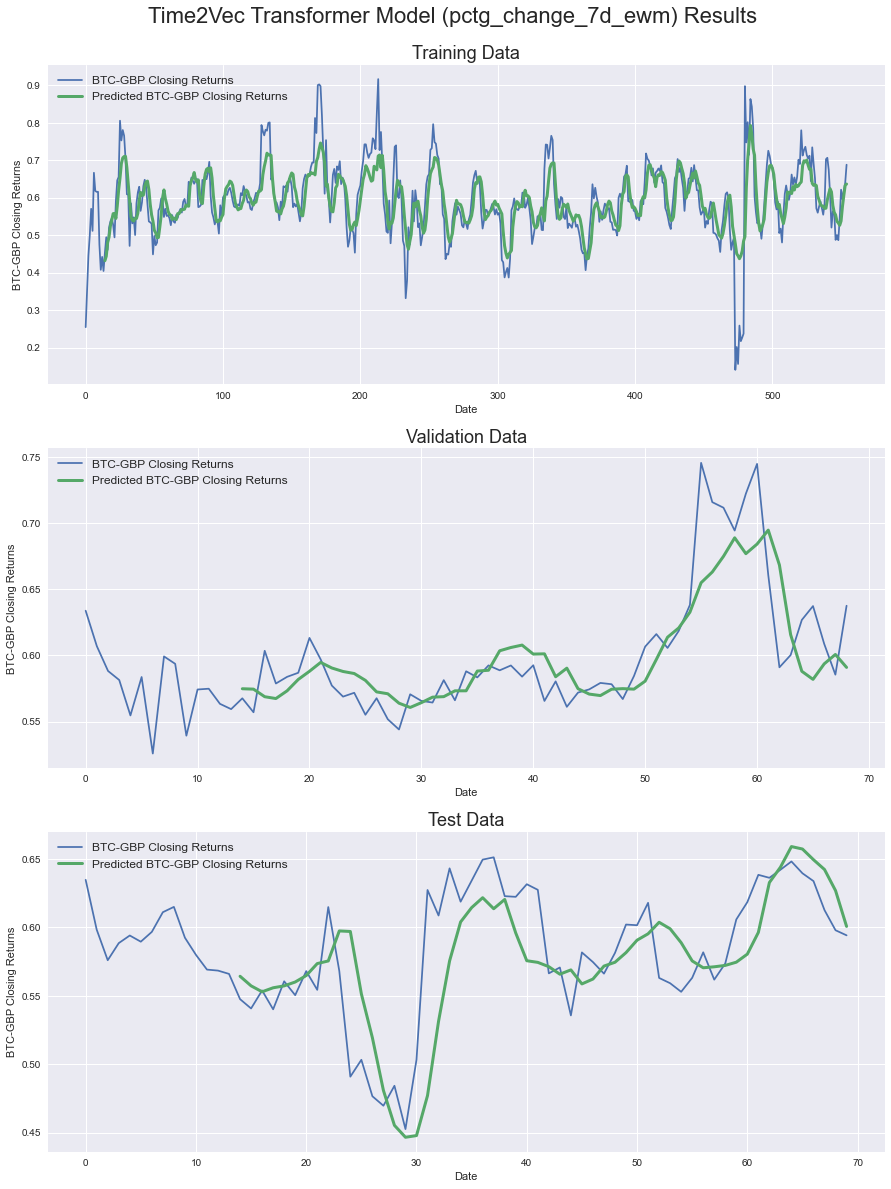

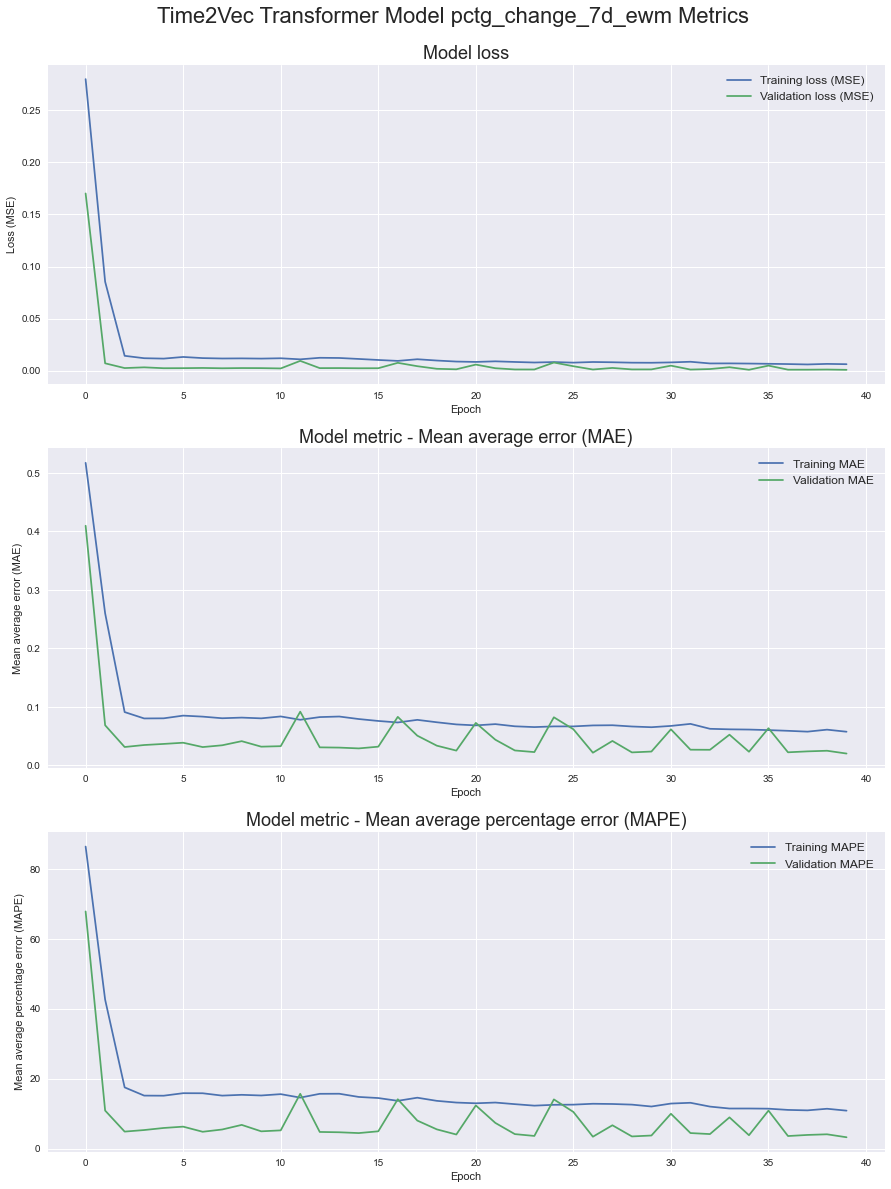

In [26]:
split_train_evalute_model(data,tvt,epochs,batch_size)